Finding the function that approximates the examples is the hard part of the job (what we called the “training phase” earlier). The prediction phase that follows is easier: the system forgets all about the examples

Problem Statement: Predict pizza sales.
input file piza.txt

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea 


Matplotlib is building the font cache; this may take a moment.


In [5]:
X,Y = np.loadtxt("pizza.txt",skiprows=1, unpack=True)

In [6]:
print(X[:5])
print(Y[:5])

[13.  2. 14. 23. 13.]
[33. 16. 32. 51. 27.]


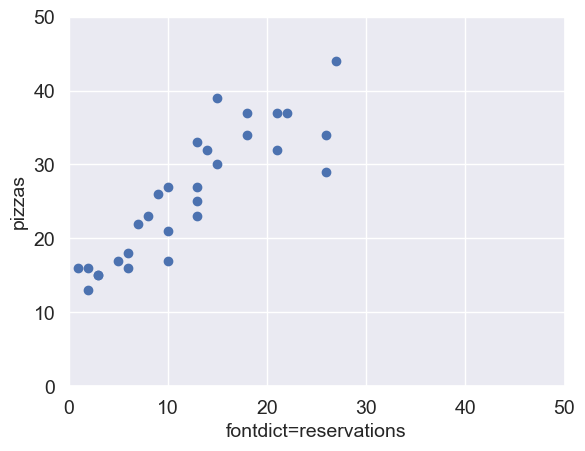

In [7]:
sea.set()
plt.axis([0,50,0,50])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("fontdict=reservations",fontsize=14)
plt.ylabel("pizzas",fontsize=14)
plt.plot(X,Y,"bo")
plt.show()



Training phase
Trace a line that approximates the examples.

Prediction phase
Use the line to predict the label from the input variable.

Defining the model

To turn linear regression into running code, we need some way to represent the line numerically. That’s where mathematics comes into the picture.

Here is the mathematical equation of a line that passes by the origin of the axes: y=xw

y = predicted value, x = input value, w = weight (ML)/ slope (statistic)


In [18]:
#Implement prediction
'''The predict() function predicts the pizzas from the reservations. 
To be more precise, it takes the input variable and 
the weight and uses them to calculate ^y'''

def predict(X,w):
    return X*w

Implement Training

Now we want to write code that implements the first part of linear regression. Given a bunch of examples (X and Y), it finds a line with weight w that approximates them. 

How? how to check how wrong are we at given point? Loss function
error = predict(X, w) - Y
This calculation has a slight technical error that the error could be zero, positive, or negative. However, an error should always be positive. If we add multiple errors together (which we’ll do soon) we may end up with two opposite-sign wrongs to make one right, which we don’t want. To guarantee that the error is always positive, let’s square it: squared_error = error ** 2

We could also use the absolute value of the error instead of squaring it. However, squaring the error has additional benefits.








In [19]:
#mean squared error
def loss(X,Y,w):
    return np.average((predict(X,w)-Y)**2)


In [20]:
#Closer and closer
'''Remember that in the training phase of linear regression 
we want to find a line that approximates the examples. 
In other words, we want to calculate w from the values in X and Y. 
We can use an iterative algorithm to do that:'''

def train(X,Y,iterations,lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X,Y,w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
        if loss(X,Y,w+lr) < current_loss:
            w+=lr
        elif loss(X,Y,w-lr) < current_loss:
            w-=lr
        else:
            return w
    raise Exception("Couldn't converge within %d iterations" % iterations)

'''To put it in more concrete terms, this algorithm rotates the line, making it 
either a tad steeper or a tad less steep at each iteration while keeping an eye on the loss. 
The higher the learning rate, the faster the system rotates the line. '''



'To put it in more concrete terms, this algorithm rotates the line, making it \neither a tad steeper or a tad less steep at each iteration while keeping an eye on the loss. \nThe higher the learning rate, the faster the system rotates the line. '

In [21]:
#Let's test the system 

w = train(X,Y,10000,0.01)
print("\nw=%.3f" % w)

#predict the number of pizzas

print("Prediction: x=%d => y=%.2f" % (20,predict(20,w)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

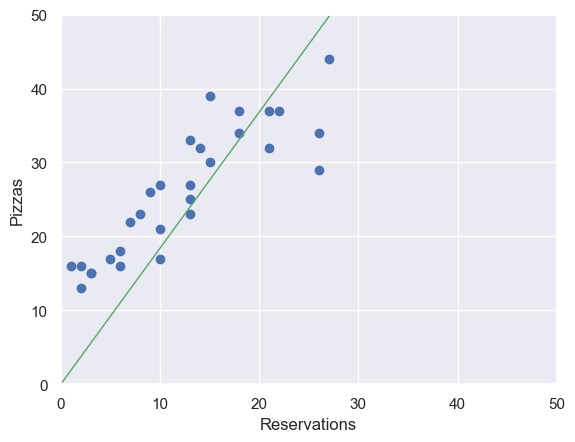

In [22]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
plt.ion()
plt.show()

Add a bias, and why?

The perfect line would have not always pass by the origin. 
To draw a line that is not constrained to pass by the origin, we need one more parameter in our model:​	y = x*w + b    <--- b = bias (ML) / y interseptor (stats)





In [23]:
#Let's add a bias to the model

def predict(X,w,b):
    return X*w + b

def loss(X,Y,w,b):
    return np.average((predict(X,w,b)-Y)**2)

def train(X,Y,iterations,lr):
    w,b = 0,0
    for i in range(iterations):
        current_loss = loss(X,Y,w,b)
        if loss(X,Y,w+lr,b) < current_loss:
            w+=lr
        elif loss(X,Y,w-lr,b) < current_loss:
            w-=lr
        elif loss(X,Y,w,b+lr) < current_loss:
            b+=lr
        elif loss(X,Y,w,b-lr) < current_loss:
            b-=lr
        else:
            return w,b
    raise Exception("Couldn't converge within %d iterations" % iterations)

            

In [15]:
#Let's test the system

w,b = train(X,Y,10000,0.01)
print("\nw=%.3f, b=%.3f" % (w,b))

#predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (20,predict(20,w,b)))



w=1.100, b=12.930
Prediction: x=20 => y=34.93


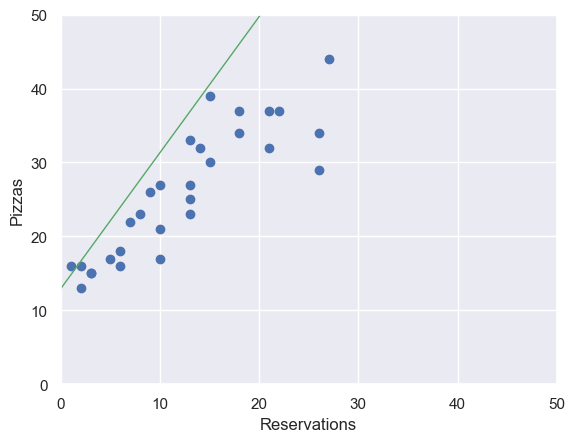

In [24]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.ion()
plt.show()

Good results so far -> Now line start from 12.9 not from origin. But we are tweking w and b not at the same time. To get optimal results we should do something that tweak w and b both at same time.

 this algorithm tweaks either w or b, looking for the values that minimize the loss. One way in which that approach could go wrong is that, as we tweak w, we might increase the loss caused by b, and the other way around. To avoid that problem and get as close as possible to the minimum loss, we should tweak both parameters at once. The more parameters we have, the more important it is to tweak them all at the same time. 

By doing the math, we’ll find that the total number of tweaking combinations, including the one where all the parameters stay unchanged, would be 3 to the power of the number of parameters. With two parameters, that would be 3**2, or nine combinations.

Calling loss() nine times per iteration doesn’t sound like a big deal, but it increases the number of parameters to 10, and we get 3**10 combinations, which is almost 60,000 calls per iteration. We might think that 10 parameters are far-fetched, but they are not.

There is also a more urgent problem in the current implementation of train(). It tweaks parameters in increments that are equal to the learning rate. If lr is large, then the parameters change quickly, which speeds up training but the final result is less precise because each parameter has to be a multiple of that large lr. To increase precision, we need a small lr, which results in even slower training. We trade off speed for precision, when we actually need both.

gradient descent (weights to loss curve)

we need to measure the slope of the loss curve. In mathspeak, that slope is called the gradient of the curve. By convention, the gradient at a certain point is an arrow that points directly uphill from that point

To measure the gradient, we can use a mathematical tool called the derivative of the loss with respect to the weight, that is written as ∂L/∂w More formally, the derivative at a certain point measures how the loss L changes at that point for small variations of w. Imagine if we increase the weight just a little bit, what will happen to the loss?

In the case of the diagram (gradient descent.png), the derivative would be a negative number, meaning that the loss decreases when w increases. If the hiker were standing on the right side of the diagram, the derivative would be positive, meaning that the loss increases when w increases. At the minimum point of the curve, (the point marked with the cross) the curve is level, and the derivative is zero.

Note that the hiker would have to walk in the direction opposite to the gradient to approach the minimum. So, in the case of a negative derivative like the one in the picture, they would take a step in the positive direction. The size of the hiker’s steps should also be proportional to the derivative. If the derivative is a big number (either positive or negative), this means the curve is steep, and the basecamp is far away. So the hiker can take big steps with confidence. As they approach the basecamp, the derivative becomes smaller, and so do their steps.

The algorithm described above is called gradient descent or GD for short. Implementing it requires a tiny bit of math.


Loss function with derivative with respect to weight:
          m
L = (1/m) ∑ ((wxi + b) - yi)**2
         i=1

              m
∂L/∂w = (2/m) ∑  xi ((wxi + b) - yi)
             i=1

In [33]:
'''The derivative of the loss is similar to the loss itself, 
except that the power of 2 is gone, each element of the sum has been multiplied by x, 
and the final result is multiplied by 2. 
We can add any value of w into this formula and calculate the gradient at that point.

Here’s the same formula converted to code where b is fixed at 0:'''

def gradient(X,Y,w):
    return 2* np.average(X*(predict(X,w,0)-Y))

'''The gradient() function takes the input variable X and the weight w, and returns the gradient of the loss with respect to w. 
The gradient is a number that tells us how the loss changes when w increases. If the gradient is positive, the loss increases when w increases, 
and if it’s negative, the loss decreases.'''




'The gradient() function takes the input variable X and the weight w, and returns the gradient of the loss with respect to w. \nThe gradient is a number that tells us how the loss changes when w increases. If the gradient is positive, the loss increases when w increases, \nand if it’s negative, the loss decreases.'

![My Image](gradient%20descent.png)

In [26]:
#Downhill riding

def train(X,Y,iterations,lr):
    w = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i,loss(X,Y,w,0)))

        w-= gradient(X,Y,w)*lr
    return w

In [27]:
w = train(X,Y,100,0.001)
print("\nw=%.10f" % w)


Iteration    0 => Loss: 812.8666666667
Iteration    1 => Loss: 304.3630879787
Iteration    2 => Loss: 143.5265791020
Iteration    3 => Loss: 92.6549949641
Iteration    4 => Loss: 76.5646303400
Iteration    5 => Loss: 71.4753484132
Iteration    6 => Loss: 69.8656402969
Iteration    7 => Loss: 69.3564996643
Iteration    8 => Loss: 69.1954616593
Iteration    9 => Loss: 69.1445263431
Iteration   10 => Loss: 69.1284158205
Iteration   11 => Loss: 69.1233201627
Iteration   12 => Loss: 69.1217084379
Iteration   13 => Loss: 69.1211986595
Iteration   14 => Loss: 69.1210374197
Iteration   15 => Loss: 69.1209864206
Iteration   16 => Loss: 69.1209702899
Iteration   17 => Loss: 69.1209651878
Iteration   18 => Loss: 69.1209635741
Iteration   19 => Loss: 69.1209630637
Iteration   20 => Loss: 69.1209629022
Iteration   21 => Loss: 69.1209628512
Iteration   22 => Loss: 69.1209628350
Iteration   23 => Loss: 69.1209628299
Iteration   24 => Loss: 69.1209628283
Iteration   25 => Loss: 69.1209628278
Iteration

Prediction: x=20 => y=36.87


(0.0, 50.0, 0.0, 50.0)

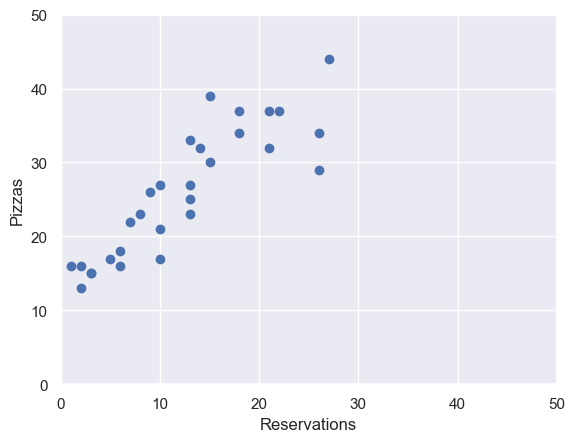

In [28]:
print("Prediction: x=%d => y=%.2f" % (20,predict(20,w,0)))

plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])

Review loss function

If we change b from a constant to a variable, the loss is not a two-dimensional curve anymore.

Now we need to calculate the gradient of a function of multiple variables. Fortunately we can do that with a technique called partial derivatives.

![My Image](GD%20with%20weight%20and%20bias.png)

We will keep rest of the variable constant and variable of interest as derivate <- called partial derivation. 

We will do this for all the variables. In our case b = 0 -> dL/dw
Then w =0 -> dL/db

In concrete, we can calculate partial derivatives by taking each variable (in our case, w and b) and pretending that it’s the only variable in the function. Just imagine that everything else is constant, and calculate the derivative with respect to that sole variable. 

We already did half of that work when we fixed b and calculated the derivative of 
L with respect to w:

              m
∂L/∂w = (2/m) ∑  xi ((wxi + b) - yi)
             i=1

Now we need to do the same, only the other way around. Let’s suppose w is a constant, and take the derivative of L with respect to b. We can calculate that partial derivative using calculus. The solution is given below:

              m
∂L/∂b = (2/m) ∑  ((wxi + b) - yi)
             i=1



In [34]:
# computing the derivative
def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient = 2 * np.average(predict(X, w, b) - Y)
    return (w_gradient, b_gradient)

In [35]:
# calling the training function for 20,000 iterations
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        if (i % 5000 == 0):
            print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b

In [36]:
w, b = train(X, Y, iterations=20000, lr=0.001)
print("\nw=%.10f, b=%.10f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.8666666667
Iteration 5000 => Loss: 23.0660254210
Iteration 10000 => Loss: 22.8438317248
Iteration 15000 => Loss: 22.8427421050

w=1.0811301700, b=13.1722676564
Prediction: x=20 => y=34.79


When gradient descent fails

GD does not give us any guarantees. By using it, we could follow a longer route than the shortest possible one. We could step past the basecamp and then have to backtrack. We could even step further away from the basecamp.

There are also a few unlucky cases where gradient descent might miss its target entirely. One such case has to do with the learning rate. However, most GD failures have to do with the shape of the loss surface.


GD works well as long as the loss surface has a few characteristics. According to mathspeak, a good loss function should be:

Convex: It does not have bumps that result in local minima.
Continuous: It does not have vertical cliffs or gaps.
Differentiable: It’s smooth, without cusps and other weird spots where we cannot even calculate a derivative.

GD works well as long as the loss surface has a few characteristics. According to mathspeak, a good loss function should be:

Convex: It does not have bumps that result in local minima.
Continuous: It does not have vertical cliffs or gaps.
Differentiable: It’s smooth, without cusps and other weird spots where we cannot even calculate a derivative.

Add More Dimensions
Explore what happens when we deal with more and more dimensional data.

If we add a second input variable ( the temperature), then the examples are not lying on a plane anymore. They are points in three-dimensional space. To approximate them, we can use the equivalent of a line, with one more dimension called a plane, as shown in the following graph:

![My Image](multiple%20input%20variable.png)

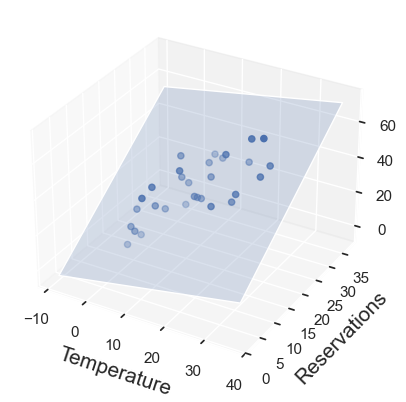

In [42]:
# Plot a plane that roughly approximates a dataset with two input variables.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import seaborn as sns

# Import the dataset
x1, x2, x3, y = np.loadtxt("pizza_3_vars.txt", skiprows=1, unpack=True)

# These weights came out of the training phase
w = np.array([-3.98230894, 0.37333539, 1.69202346])

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Temperature", labelpad=5, fontsize=15)
ax.set_ylabel("Reservations", labelpad=5, fontsize=15)
ax.set_zlabel("Pizzas", labelpad=5, fontsize=15)

# Plot the data points
ax.scatter3D(x1, x2, y, color='b')

# Plot the plane
MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
xs, ys = np.meshgrid(edges_x, edges_y)
zs = np.array([w[0] + x * w[1] + y * w[2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.show()

We can calculate ^y
 by using the equation of a plane. That’s similar to the equation of a line but it has two input variables, x1,x2 and two weights, w1,w2:

 ^y = x1*w1 + x2*w2 + b
 
If we do not need a separate weight for each input variable, consider that in Roberto’s dataset, x1 is the number of reservations and x2 is the temperature. It makes sense that the reservations and the temperature have different impacts on the number of pizzas, so they must have different weights.

In the equation of a line, the bias b shifts the line away from the origin. The same goes for a plane: if we did not have b, then the plane would be constrained to pass by the origin of the axes. If we want to prove that, just set all the input variables to 0. Without a bias, ^y would also be 0. Thanks to the bias, the plane is free to shift vertically and find the position where it approximates the points as much as it can.

We started by approximating bi-dimensional examples with a one-dimensional model. Then we moved on to approximate three-dimensional examples with a bi-dimensional model.

To approximate examples with n dimensions, we need an (n−1) -dimensional shape.

Humans cannot perceive more than three spatial dimensions. However, math has no problem dealing with those sanity-bending multidimensional spaces. It just calls them hyperspaces and describes them with the same equations as bi-dimensional and three-dimensional spaces. However, no matter how many dimensions we have, we can just add input variables and weights to the formula of the line and the plane:

^y = x1*w1 + x2*w2 + x3*w3 + ... + b

This formula is called the weighted sum of the inputs. The equation of a line is a special case of this equation. It is the weighted sum of a single input. So, here’s a simple plan to upgrade our learning program from one to many input variables: we’ll replace the equation of a line with the more generic formula of the weighted sum.

In [43]:
#Upgrade the Learner for multiple input variables
'''
1. load and prepare multidimensional data, to feed into the learner.
2. after preparing the data, we will upgrade all the functions in code to use new model. 
Switch from a line to more generic weighted sum.'''

x1,x2,x3,y = np.loadtxt("pizza_3_vars.txt",skiprows=1,unpack=True)


In [46]:
x1.shape
y.shape



(30,)

In [47]:
#Let’s build the X matrix by joining the first three arrays together:

X = np.column_stack((x1,x2,x3))
X.shape

(30, 3)

In [48]:
X[:2]


array([[13., 26.,  9.],
       [ 2., 14.,  6.]])

In [49]:
'''Now that we have taken care of X, let’s look at y with one-dimensional 
(30,) shape.
A useful trick is that we should avoid mixing NumPy matrices and one-dimensional arrays. 
Code that involves both can have surprising behavior. For this reason, 
as soon as we have a one-dimensional array, it’s better to reshape it 
into a matrix with the reshape() function:'''

Y = y.reshape(-1,1) #-1 means that the number of rows is inferred from the size of the array.
Y.shape


(30, 1)

In [50]:
'''
Just as we need one x per input variable, we also need one w per input variable. 
Unlike the x′s, though, the w′s will be the same for each example. 
So we could make the weights a matrix of (n,1) or a matrix of (1,n). 
For reasons that will become clear in a moment, it’s better to make it (n,1): 
one row per input variable, and a single column.

Let’s initialize this matrix of (n,1). Remember that we used to initialize 
w at zero? Now w is a matrix, so we must initialize all its elements to zeros. 
NumPy has a zeros() function for that:
'''


w = np.zeros((X.shape[1],1))
w.shape # (3,1)

(3, 1)

In [51]:
#upgrade the prediction

def predict(X,w):    #(30,3) * (3,1) = (30,1) -> reason that we choose (n,1)
    return np.matmul(X,w)

#upgrade the loss function

'''we do not need to change the way we calculate the loss at all. 
Our mean squared error code works with multiple input variables 
just as well as it did with one variable.'''
def loss(X,Y,w):
    return np.average((predict(X,w)-Y)**2)




In [52]:
#upgrade the gradient : we need to upgrade the gradient of the loss to multiple variables.

def gradient(X, Y, w):
   return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]


In [53]:
#perform the training

def train(X,Y,iterations,lr):
    w = np.zeros((X.shape[1],1))
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

In [54]:
w = train(X,Y,iterations=50000,lr=0.001)

Iteration    0 => Loss: 1333.5666666667
Iteration    1 => Loss: 151.1431136188
Iteration    2 => Loss: 64.9946080866
Iteration    3 => Loss: 57.2691562662
Iteration    4 => Loss: 55.2329817467
Iteration    5 => Loss: 53.6824684737
Iteration    6 => Loss: 52.2396865457
Iteration    7 => Loss: 50.8720490875
Iteration    8 => Loss: 49.5721379442
Iteration    9 => Loss: 48.3347816093
Iteration   10 => Loss: 47.1553762817
Iteration   11 => Loss: 46.0297285724
Iteration   12 => Loss: 44.9540103944
Iteration   13 => Loss: 43.9247250041
Iteration   14 => Loss: 42.9386766851
Iteration   15 => Loss: 41.9929432745
Iteration   16 => Loss: 41.0848512337
Iteration   17 => Loss: 40.2119530253
Iteration   18 => Loss: 39.3720065826
Iteration   19 => Loss: 38.5629566766
Iteration   20 => Loss: 37.7829180046
Iteration   21 => Loss: 37.0301598411
Iteration   22 => Loss: 36.3030921055
Iteration   23 => Loss: 35.6002527154
Iteration   24 => Loss: 34.9202961064
Iteration   25 => Loss: 34.2619828092
Iteration

#Adding bias

'''
We could rush to the code and add the bias everywhere, 
as we did in the previous chapter but hold on a minute. 
Let’s learn how to roll the bias into the code more smoothly.

Give another look at the previous formula. What’s the difference between 
the bias and the weights? The only difference is that the weights are multiplied by 
some input variable x, and the bias is not. Now imagine that there is 
one more input variable in the system (let’s call it x0) that always has a value of 1. 
We can rewrite the formula like this:

y = x1*w1 + x2+w2 + ... + xn*wn + x0*b

Now there’s no difference between bias and weights. 
The bias is just the weight of an input variable that has the constant value 1. 
So, the trick is to add a dummy input variable with the constant value 1, 
and we would not need an explicit bias anymore.
'''



In [57]:
#Adding bias after loading data, do not modify original file please!

X = np.column_stack((np.ones(x1.size),x1,x2,x3))
#Y = y.reshape(-1,1)
w = train(X,Y,100000,0.001)



Iteration    0 => Loss: 1333.5666666667
Iteration    1 => Loss: 152.3714817367
Iteration    2 => Loss: 65.1725214340
Iteration    3 => Loss: 57.2934810704
Iteration    4 => Loss: 55.2440837501
Iteration    5 => Loss: 53.6954803450
Iteration    6 => Loss: 52.2556733336
Iteration    7 => Loss: 50.8907327600
Iteration    8 => Loss: 49.5931505348
Iteration    9 => Loss: 48.3577774793
Iteration   10 => Loss: 47.1800397298
Iteration   11 => Loss: 46.0557724175
Iteration   12 => Loss: 44.9811739203
Iteration   13 => Loss: 43.9527719743
Iteration   14 => Loss: 42.9673934807
Iteration   15 => Loss: 42.0221371525
Iteration   16 => Loss: 41.1143487016
Iteration   17 => Loss: 40.2415983249
Iteration   18 => Loss: 39.4016602773
Iteration   19 => Loss: 38.5924943361
Iteration   20 => Loss: 37.8122289825
Iteration   21 => Loss: 37.0591461381
Iteration   22 => Loss: 36.3316673149
Iteration   23 => Loss: 35.6283410443
Iteration   24 => Loss: 34.9478314688
Iteration   25 => Loss: 34.2889079861
Iteration

In [58]:
print("\nWeight: %s" % w.T)
print("\n A few predictions:")
for i in range(18,24):
    print("X[%d] -> %.4f (label: %d)" % (i,predict(X[i],w),Y[i]))


Weight: [[ 2.41178207  1.23368396 -0.02689984  3.12460558]]

 A few predictions:
X[18] -> 33.5077 (label: 29)
X[19] -> 45.2145 (label: 43)
X[20] -> 31.7246 (label: 37)
X[21] -> 61.9365 (label: 62)
X[22] -> 42.9624 (label: 47)
X[23] -> 42.1975 (label: 38)


/var/folders/33/d33y821d0gx3bx3vln89pxfc0000gn/T/ipykernel_49398/3823242583.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("X[%d] -> %.4f (label: %d)" % (i,predict(X[i],w),Y[i]))


Time to use the same train function for life expectancy without country name dataset and
predict life expectancy

Fie: life-expectancy-without-country-names.txt

In [60]:
FILENAME = "life-expectancy-without-country-names.txt"
x1,x2,x3,y = np.loadtxt(FILENAME,skiprows=1,unpack=True)
X = np.column_stack((np.ones(x1.size),x1,x2,x3))
Y = y.reshape(-1,1)
w = train(X,Y,100,0.0001)

Iteration    0 => Loss: 5148.4118536040
Iteration    1 => Loss: 3235.5509116518
Iteration    2 => Loss: 2041.8737711215
Iteration    3 => Loss: 1296.8712615923
Iteration    4 => Loss: 831.8009269614
Iteration    5 => Loss: 541.3987540912
Iteration    6 => Loss: 359.9968497392
Iteration    7 => Loss: 246.6267438367
Iteration    8 => Loss: 175.7274397481
Iteration    9 => Loss: 131.3494144898
Iteration   10 => Loss: 103.5392212157
Iteration   11 => Loss: 86.0842531367
Iteration   12 => Loss: 75.1059220148
Iteration   13 => Loss: 68.1820498736
Iteration   14 => Loss: 63.7993715454
Iteration   15 => Loss: 61.0119567849
Iteration   16 => Loss: 59.2280862278
Iteration   17 => Loss: 58.0772604911
Iteration   18 => Loss: 57.3272009883
Iteration   19 => Loss: 56.8320404753
Iteration   20 => Loss: 56.4999744688
Iteration   21 => Loss: 56.2730566819
Iteration   22 => Loss: 56.1145737500
Iteration   23 => Loss: 56.0011512781
Iteration   24 => Loss: 55.9178141850
Iteration   25 => Loss: 55.85489241

In [61]:
print("Weights: %s" % w.T)
print("\nA few predictions:")

for i in range(10):
    print("X[%d] -> %.4f (label: %d)" % (i,predict(X[i],w),Y[i]))

Weights: [[0.02375353 0.05278059 0.14657346 0.7650678 ]]

A few predictions:
X[0] -> 77.1124 (label: 76)
X[1] -> 78.5113 (label: 74)
X[2] -> 78.2247 (label: 82)
X[3] -> 79.0417 (label: 81)
X[4] -> 68.3356 (label: 71)
X[5] -> 77.1656 (label: 75)
X[6] -> 80.4451 (label: 76)
X[7] -> 70.9795 (label: 71)
X[8] -> 78.1985 (label: 75)
X[9] -> 78.1921 (label: 72)


/var/folders/33/d33y821d0gx3bx3vln89pxfc0000gn/T/ipykernel_49398/2772134224.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("X[%d] -> %.4f (label: %d)" % (i,predict(X[i],w),Y[i]))


Some of the predictions are pretty close to the labels. Others miss the target pretty badly. The reason for those failures is that our hyperplane-based model is too simple to approximate the examples. When we introduced linear regression, we said that we could approximate the points with a line only if the points are roughly aligned to begin with. If we add more dimensions to the points, the same reasoning applies. To approximate this complex real-world dataset, we need a non-straight shape, instead of a straight hyperplane.

Rise of Perceptron